<a href="https://colab.research.google.com/github/arcrowell/arcrowell.github.io/blob/main/K_Means_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/data/mall_customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.drop(columns = 'CustomerID')
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
df.rename(columns = {'Genre':'Gender',"Annual Income (k$)":"Income","Spending Score (1-100)":"Spend_Score"}, inplace = True)

In [7]:
x_2d = ['Age','Income']
scaler = StandardScaler()
x_2d_s = scaler.fit_transform(df[x_2d])

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(x_2d_s)

In [10]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [11]:
df2 = df.copy()
df2['label'] = labels

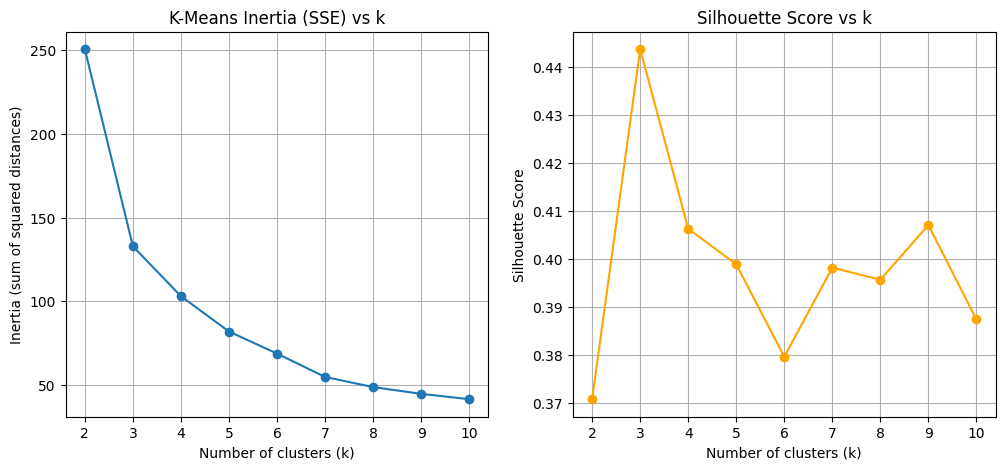

In [8]:
# Problem 1. Rerun k-means 2-dimensions using age and salary.

k_values = range(2, 11)

inertia_list = []
silhouette_list = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(x_2d_s)  # your scaled features
    inertia_list.append(km.inertia_)
    silhouette_list.append(silhouette_score(x_2d_s, labels))

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Plot Inertia
axes[0].plot(k_values, inertia_list, marker='o')
axes[0].set_title('K-Means Inertia (SSE) vs k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia (sum of squared distances)')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Plot Silhouette
axes[1].plot(k_values, silhouette_list, marker='o', color='orange')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

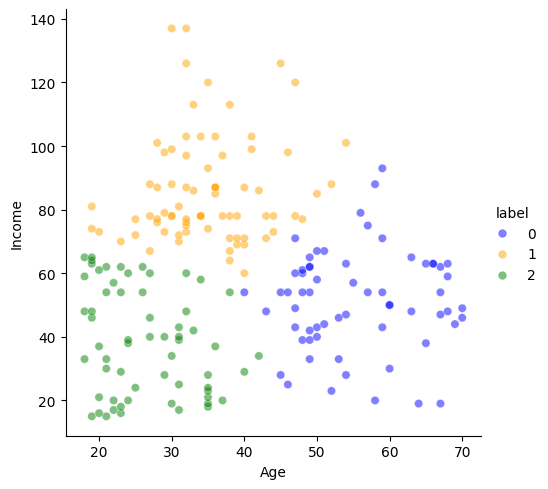

In [12]:
# Problem 1. Plot of Age and Income with labels for each group.

sns.relplot(kind='scatter', data = df2, x = 'Age', y='Income', hue = 'label', alpha=0.5, palette= {0:'blue', 1:'orange', 2:'green'})

In [13]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers

array([[55.55555556, 51.26984127],
       [34.96052632, 85.93421053],
       [26.44262295, 38.54098361]])

In [15]:
# Problem 1: What is the typical age and salary for each group?

centers_df = pd.DataFrame(centers,columns=['Age','Income'])
centers_df['label'] = 'Center'
centers_df

,Age,Income,label
0,55.555556,51.269841,Center
1,34.960526,85.934211,Center
2,26.442623,38.540984,Center


In [16]:
# Problem 1: How many individuals are in each group?

df2.label.value_counts().sort_index()

,count
label,
0,63
1,76
2,61


In [17]:
# Problem 1: What is the maximum and minimum age and income for each group?

df2.groupby('label')[['Age','Income']].agg(['max','min'])

Age     Income    
      max min    max min
label                   
0      70  40     93  19
1      54  19    137  60
2      42  18     65  15

In [20]:
# Problem 2: Rerun k-means with all 3 dimensions using k = 5 instead.

x_3d = ['Age','Income','Spend_Score']
x_3d_s = scaler.fit_transform(df[x_3d])

km = KMeans(n_clusters=5, random_state=42, n_init='auto')
labels = km.fit_predict(x_3d_s)          # cluster labels

labels

array([2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [21]:
df_3d = df.copy()
df_3d['label'] = labels
df_3d

,Gender,Age,Income,Spend_Score,label
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,4
197,Male,32,126,74,1
198,Male,32,137,18,4


In [23]:
centers_scaled = km.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
center_df = pd.DataFrame(centers,columns=['Age','Income','Spend_Score']).rename_axis('cluster')

In [24]:
# Problem 2: What is the typical age and salary for each group?

center_df

,Age,Income,Spend_Score
cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


In [25]:
# Problem 2: How many individuals are in each group?

df_3d.label.value_counts().sort_index()

,count
label,
0,58
1,40
2,26
3,45
4,31


In [26]:
# Problem 2: What is the maximum and minimum age and income for each group?

df_3d.groupby('label')[['Age','Income']].agg(['max','min'])

Age     Income    
      max min    max min
label                   
0      70  40     67  19
1      40  27    137  69
2      35  18     42  15
3      40  18     81  16
4      59  32    137  71

In [27]:
# Problem 3: Partition the Dataset into df_m

df_m = df[df['Gender'] == 'Male']
df_m

,Gender,Age,Income,Spend_Score
0,Male,19,15,39
1,Male,21,15,81
8,Male,64,19,3
10,Male,67,19,14
14,Male,37,20,13
...,...,...,...,...
187,Male,28,101,68
192,Male,33,113,8
197,Male,32,126,74
198,Male,32,137,18


In [28]:
# Problem 3: Partition the Dataset into df_f

df_f = df[df['Gender'] == 'Female']
df_f

,Gender,Age,Income,Spend_Score
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
...,...,...,...,...
191,Female,32,103,69
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79


In [30]:
# Problem 3: What dimension did you use?

x_2d = ['Age','Spend_Score']

m_scaler = StandardScaler()
mx_2d_s = m_scaler.fit_transform(df_m[x_2d])

f_scaler = StandardScaler()
fx_2d_s = f_scaler.fit_transform(df_f[x_2d])

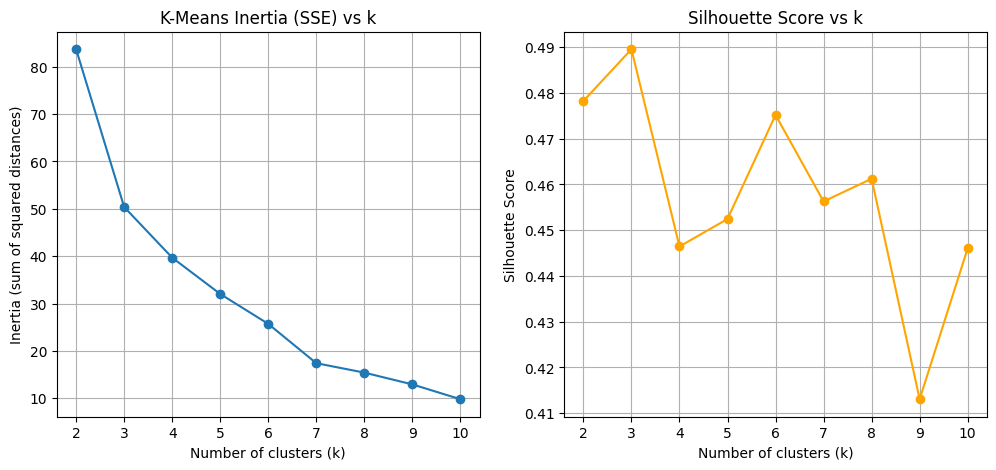

In [56]:
# Problem 3: What is the optimal k-value for df_m

k_values = range(2, 11)

inertia_list = []
silhouette_list = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(mx_2d_s)  # your scaled features
    inertia_list.append(km.inertia_)
    silhouette_list.append(silhouette_score(mx_2d_s, labels))

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Plot Inertia
axes[0].plot(k_values, inertia_list, marker='o')
axes[0].set_title('K-Means Inertia (SSE) vs k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia (sum of squared distances)')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Plot Silhouette
axes[1].plot(k_values, silhouette_list, marker='o', color='orange')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

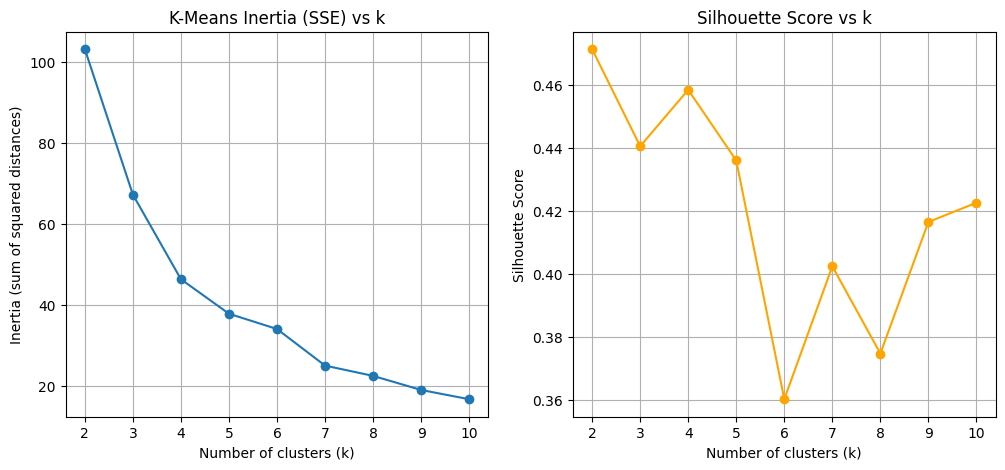

In [55]:
# Problem 3: What is the optimal k-value for df_f

k_values = range(2, 11)

inertia_list = []
silhouette_list = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(fx_2d_s)  # your scaled features
    inertia_list.append(km.inertia_)
    silhouette_list.append(silhouette_score(fx_2d_s, labels))

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Plot Inertia
axes[0].plot(k_values, inertia_list, marker='o')
axes[0].set_title('K-Means Inertia (SSE) vs k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia (sum of squared distances)')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Plot Silhouette
axes[1].plot(k_values, silhouette_list, marker='o', color='orange')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

In [33]:
m_kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
mlabels = m_kmeans.fit_predict(mx_2d_s)

In [34]:
mlabels

array([2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2],
      dtype=int32)

In [35]:
f_kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
flabels = f_kmeans.fit_predict(fx_2d_s)

In [36]:
flabels

array([0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 1, 3, 0, 2, 1, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2,
       1, 2], dtype=int32)

In [37]:
df_m3 = df_m.copy()

df_f4 = df_f.copy()

In [38]:
df_m3['label'] = mlabels

df_f4['label'] = flabels

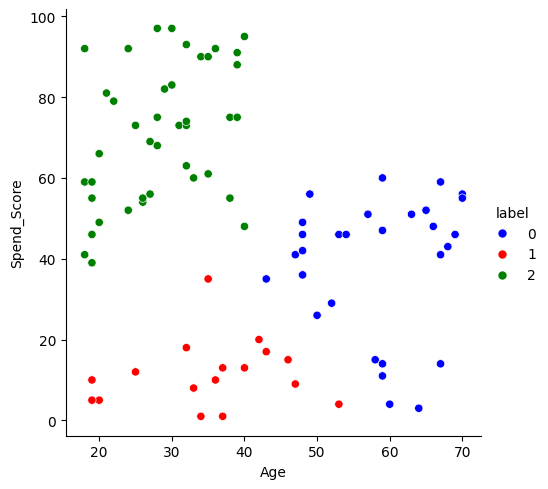

In [39]:
# Problem 3: Plot Age and Spend_Score of df_m data set

sns.relplot(kind='scatter', data = df_m3, x = 'Age', y='Spend_Score', hue = 'label', palette= {0:'blue', 1:'red', 2:'green'})

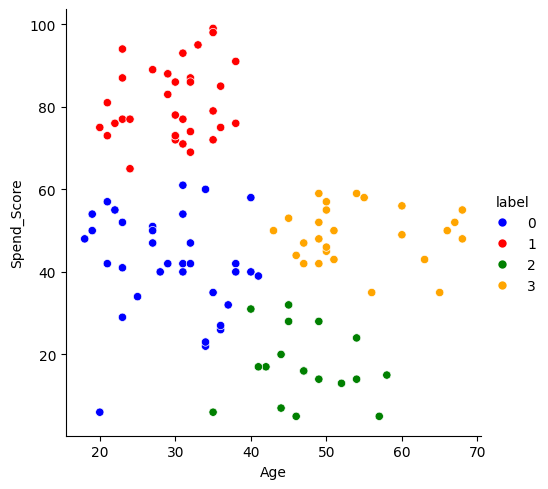

In [40]:
# Problem 3: Plot Age and Spend_Score of df_f data set

sns.relplot(kind='scatter', data = df_f4, x = 'Age', y='Spend_Score', hue = 'label', palette= {0:'blue', 1:'red', 2:'green', 3:'orange'})

In [41]:
m_centers_scaled = m_kmeans.cluster_centers_
m_centers = m_scaler.inverse_transform(m_centers_scaled)

f_centers_scaled = f_kmeans.cluster_centers_
f_centers = f_scaler.inverse_transform(f_centers_scaled)

In [42]:
m_centers

array([[57.83333333, 38.6       ],
       [35.17647059, 11.52941176],
       [28.53658537, 71.09756098]])

In [43]:
f_centers

array([[29.5       , 42.        ],
       [29.61764706, 81.23529412],
       [47.16666667, 17.11111111],
       [54.15384615, 48.96153846]])

In [44]:
centers_df_m3 = pd.DataFrame(m_centers,columns=['Age','Spend_Score'])
centers_df_m3['label'] = 'Center'

centers_df_f4 = pd.DataFrame(f_centers,columns=['Age','Spend_Score'])
centers_df_f4['label'] = 'Center'

In [47]:
# Problem 3: Typical age and spend_score for each group in df_m

centers_df_m3

,Age,Spend_Score,label
0,57.833333,38.600000,Center
1,35.176471,11.529412,Center
2,28.536585,71.097561,Center


In [48]:
# Problem 3: Typical age and spend_score for each group in df_f

centers_df_f4

,Age,Spend_Score,label
0,29.500000,42.000000,Center
1,29.617647,81.235294,Center
2,47.166667,17.111111,Center
3,54.153846,48.961538,Center


In [49]:
# Problem 3: How many individuals are in df_m

df_m3.label.value_counts().sort_index()

,count
label,
0,30
1,17
2,41


In [50]:
# Problem 3: How many individuals are in df_f

df_f4.label.value_counts().sort_index()

,count
label,
0,34
1,34
2,18
3,26


In [59]:
# Problem 3: What is the maximum and minimum for all 3 in df_m

df_m3.groupby('label')[['Age','Spend_Score']].agg(['max','min'])

Age     Spend_Score    
      max min         max min
label                        
0      70  43          60   3
1      53  19          35   1
2      40  18          97  39

In [58]:
# Problem 3: What is the maximum and minimum for all 3 in df_f

df_f4.groupby('label')[['Age','Spend_Score']].agg(['max','min'])

Age     Spend_Score    
      max min         max min
label                        
0      41  18          61   6
1      38  20          99  65
2      58  35          32   5
3      68  43          59  35